In [10]:
from reddit_db.db_manager import RedditDBManager
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
manager = RedditDBManager()


In [12]:
df = manager.get_all_sentiments()
df

,comment_id,negative_score,neutral_score,positive_score,pred_label
0,ncpqedk,0.249581,0.622482,0.127937,neutral
1,ncpqwno,0.837627,0.153812,0.008561,negative
2,ncpsaoh,0.973742,0.024005,0.002253,negative
3,ncpu9z8,0.401788,0.574273,0.023939,neutral
4,ncpw99h,0.779542,0.207625,0.012833,negative
...,...,...,...,...,...
295,nd56ke2,0.973635,0.023133,0.003232,negative
296,nd57lpe,0.974202,0.022780,0.003018,negative
297,nd58l9t,0.816218,0.159824,0.023958,negative
298,nd59bh8,0.696154,0.283433,0.020412,negative


In [ ]:
cols = ["negative_score", "neutral_score", "positive_score"]
df_long = df[cols].melt(var_name="Sentiment", value_name="Probability")
df_long

,Sentiment,Probability
0,negative_score,0.249581
1,negative_score,0.837627
2,negative_score,0.973742
3,negative_score,0.401788
4,negative_score,0.779542
...,...,...
895,positive_score,0.003232
896,positive_score,0.003018
897,positive_score,0.023958
898,positive_score,0.020412


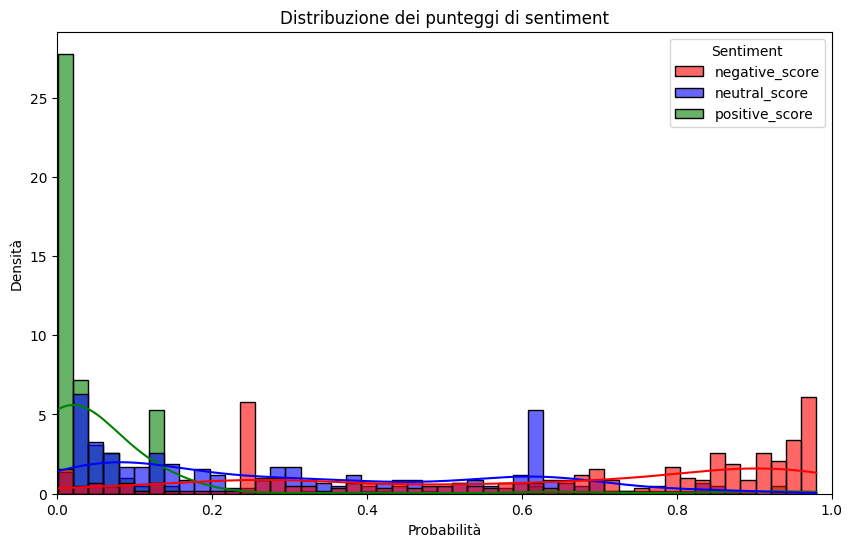

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_long,
    x="Probability",
    hue="Sentiment",
    bins=50,
    kde=True,
    stat="density",
    common_norm=False,
    palette={"negative_score": "red", "neutral_score": "blue", "positive_score": "green"},
    alpha=0.6
)
plt.xlim(0,1)
# make comments in english
plt.title("Distribution of Sentiment Scores in Comments of subreddit r/politics")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.show()